## Data exploration

This script performs some data exploration to see, what kind of data our data set contains.

In [25]:
import pandas as pd
import pathlib
import os
import sys
import seaborn as sns
import matplotlib.pyplot as plt

sys.path.append(os.path.abspath('configs'))
from config import *

In [26]:
path = pathlib.Path.cwd()
data_path = path / "CompiledDataSet" / "Cassini_CDA_Events_V1.csv"

df = pd.read_csv(data_path, index_col=0, parse_dates=["EVENT_TIME"])

In [27]:
# Drop highly correlated and unrelated columns
drop = [
    "QP_SIGNAL_FLAG",
    "QI_SIGNAL_FLAG",
    "QC_SIGNAL_FLAG",
    "QT_SIGNAL_FLAG",
    "SOURCE_VOLUME",
    "SOURCE_FILE",
    "EVENT_ID"
]
df = df.drop(columns=drop)

In [28]:
df.head()

,EVENT_TIME,QP_AMPLITUDE,QI_AMPLITUDE,QT_AMPLITUDE,QC_AMPLITUDE,QI_RISE_TIME,QT_RISE_TIME,QC_RISE_TIME,SPACECRAFT_RA,SPACECRAFT_DEC,SC_SUN_DIST,SC_SIII_LONG,SC_SIII_LAT,SC_SAT_DIST,SC_X_VEL,SC_Y_VEL,SC_Z_VEL,DETECTOR_RA,DETECTOR_DEC
0,2005-01-01 00:02:42,0.0,0.0,5.800000e-15,0.0,NaN,0.000001,NaN,115.32,21.44,9.0501,223.44,12.46,59.63,-8.38,-4.45,-1.08,67.33,59.25
1,2005-01-01 00:04:55,0.0,0.0,4.700000e-15,0.0,NaN,0.000001,NaN,115.32,21.44,9.0501,223.44,12.46,59.63,-8.38,-4.45,-1.08,67.60,59.23
2,2005-01-01 00:07:36,0.0,0.0,0.000000e+00,0.0,NaN,NaN,NaN,115.32,21.44,9.0501,223.44,12.46,59.63,-8.38,-4.45,-1.08,67.91,59.21
3,2005-01-01 00:09:24,0.0,0.0,0.000000e+00,0.0,NaN,NaN,NaN,115.32,21.44,9.0501,223.44,12.46,59.63,-8.38,-4.45,-1.08,68.19,59.30
4,2005-01-01 00:13:05,0.0,0.0,1.700000e-14,0.0,NaN,-0.000098,NaN,115.32,21.44,9.0501,223.45,12.46,59.63,-8.38,-4.45,-1.08,68.68,59.29


In [29]:
# Limit the amplitude data to reasonable quantiles
amplitude_cols = ["QI_AMPLITUDE", "QT_AMPLITUDE", "QC_AMPLITUDE"]

for col in amplitude_cols:
    q_low = df[col].quantile(0.01)
    q_high = df[col].quantile(0.99)
    # Set values outside [q_low, q_high] to NaN
    df.loc[(df[col] < q_low) | (df[col] > q_high), col] = np.nan

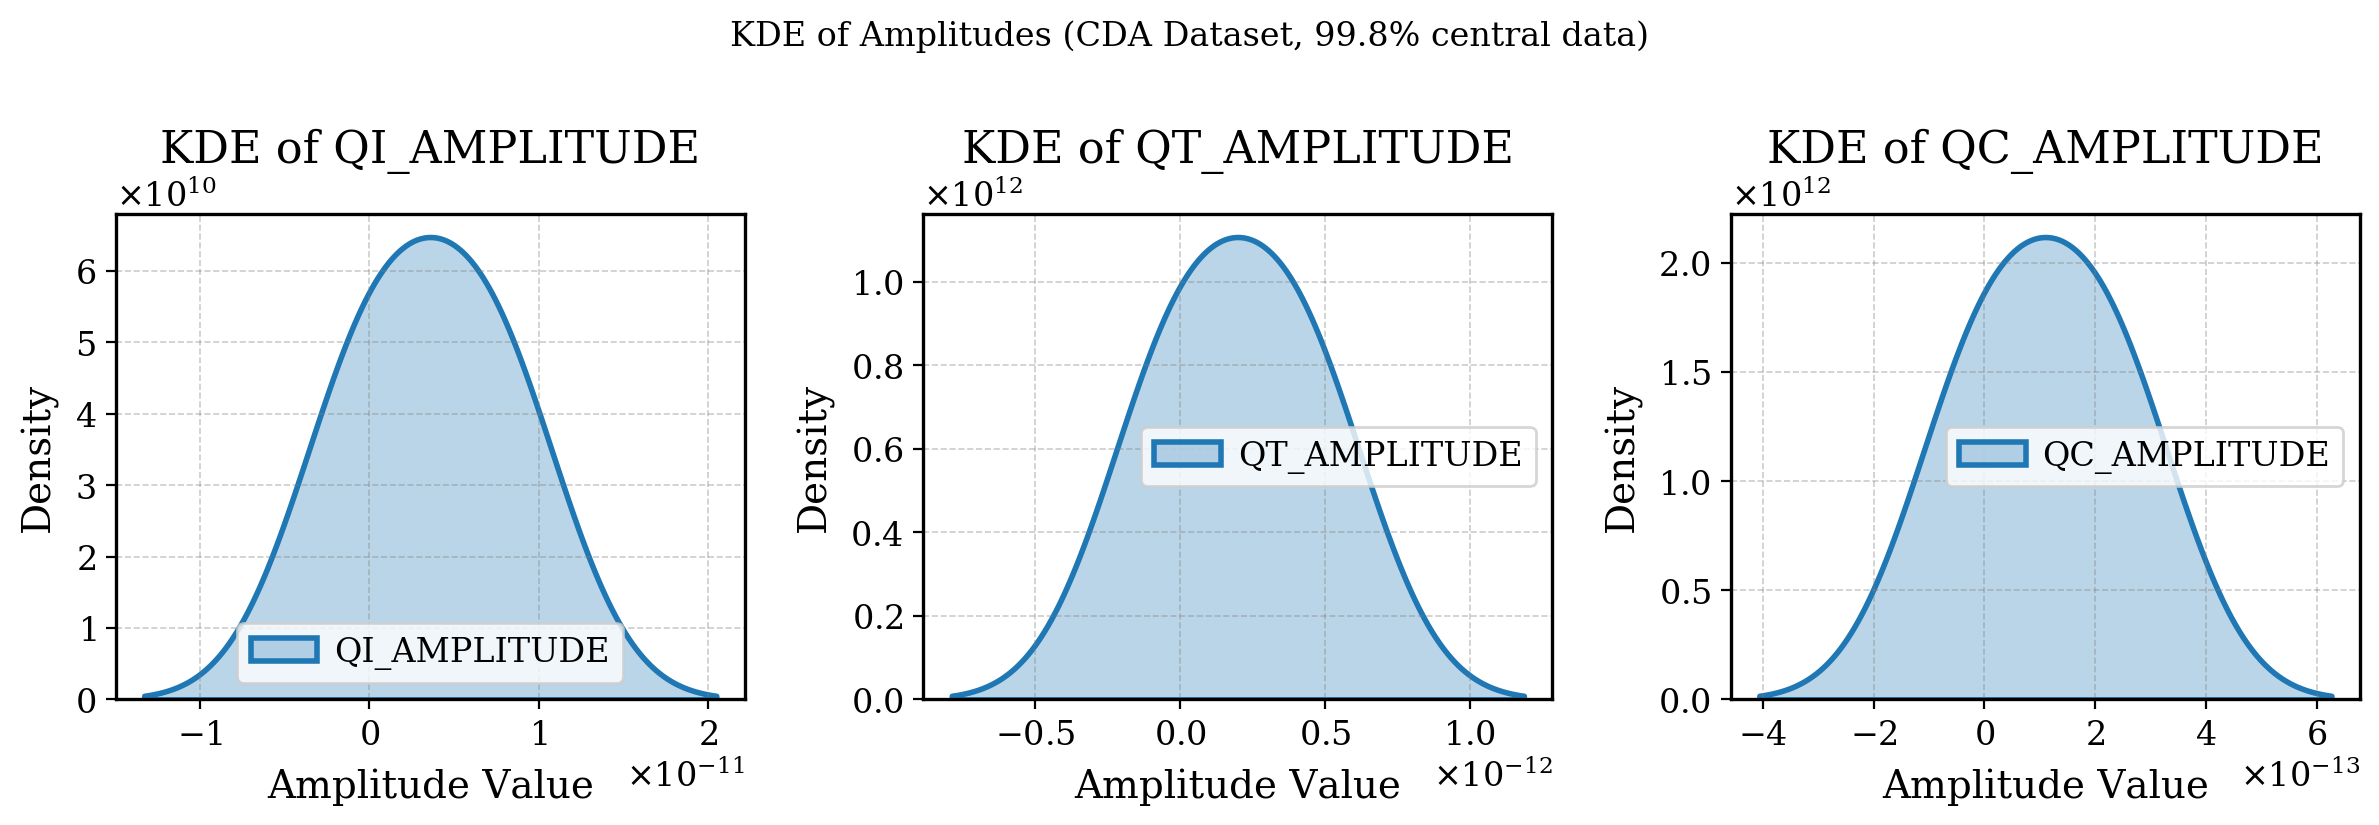

In [30]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
axs = axs.flatten()

for i, col in enumerate(amplitude_cols):
    ax = axs[i]
    # Trim only extreme lower and upper 0.1% (keep 99.8% of values)
    data = df[col].dropna().quantile([0.01, 0.99])
    sns.kdeplot(data, label=col, fill=True, alpha=0.3, lw=2, ax=ax)
    ax.set_xlabel("Amplitude Value")
    ax.set_ylabel("Density")
    ax.set_title(f"KDE of {col}")
    ax.legend()

plt.suptitle("KDE of Amplitudes (CDA Dataset, 99.8% central data)", y=1.02)
plt.tight_layout()
plt.show()